In [79]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa import stattools
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import scipy.stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox as lb_test
from sklearn import svm
from sklearn.linear_model import LinearRegression
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%matplotlib inline

In [80]:
data = pd.read_excel('Data.xlsx').iloc[:,2:]
date = pd.read_excel('Data.xlsx').iloc[:,0]
#data = data.set_index(pd.to_datetime(date))
Brent = pd.read_excel('Data.xlsx').iloc[:,1]
Y_train = Brent.iloc[:int(np.ceil(len(Brent)*0.7))]
Y_test = Brent.iloc[int(np.ceil(len(Brent)*0.7)):]

In [3]:
len(Brent)

496

In [81]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [82]:
scaled_data = scaler.transform(data)
pca = PCA(n_components=3)
PC= pca.fit_transform(scaled_data)

In [83]:
principalDf = pd.DataFrame(data = PC, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
X_train = principalDf.iloc[:int(np.ceil(len(principalDf)*0.7)),:]
X_test = principalDf.iloc[int(np.ceil(len(principalDf)*0.7)):,:]

## MLR

In [84]:
X = sm.add_constant(X_train)
model = LinearRegression()
model_ = sm.OLS(Y_train, X)
results = model.fit(X_train,Y_train)
Y_pred_MLR = model.predict(X_test)
results = model_.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Brent   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     840.6
Date:                Sat, 30 Apr 2022   Prob (F-statistic):          6.05e-158
Time:                        20:21:59   Log-Likelihood:                -1053.6
No. Observations:                 348   AIC:                             2115.
Df Residuals:                     344   BIC:                             2131.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    60.2987      0.512    117.729      0.000      59.291      61.306
principal component 1     7.6096      0.308     24.671      0.000       7.003       8.216
principal component 2    -1.7138      0.336     -5.103      0.000      -2.374      -1.053
principal component 3    -2.6172      0.325     -8.065      0.000      -3.256      -1.979
==============================================================================
Omnibus:                       17.933   Durbin-Watson:                   0.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.143
Skew:                           0.236   Prob(JB):                     5.22e-09
Kurtosis:                       4.552   Cond. No.                         5.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Test MSE: 148.334


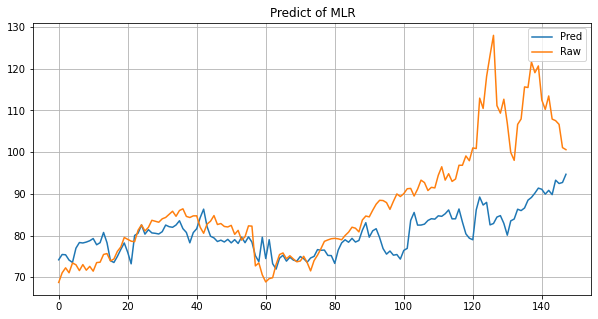

In [85]:
plt.figure(figsize = [10,5])
plt.plot(range(len(X_test)), Y_pred_MLR, label = 'Pred')
plt.plot(range(len(X_test)), Y_test, label = 'Raw')
plt.title("Predict of MLR")
plt.grid()
plt.legend()
plt.savefig('./Latex/MLR.png')
mse = mean_squared_error(Y_test, Y_pred_MLR)
print('Test MSE: %.3f' % mse)

(array([  6.,   6.,  46., 111., 179.,  87.,  31.,  13.,  15.,   2.]),
 array([-16.87392933, -13.16035883,  -9.44678833,  -5.73321783,
         -2.01964732,   1.69392318,   5.40749368,   9.12106418,
         12.83463468,  16.54820519,  20.26177569]),
 <BarContainer object of 10 artists>)

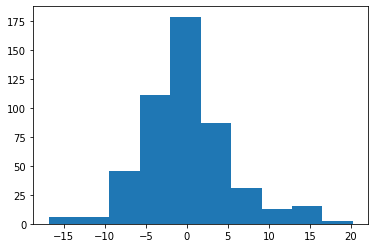

In [14]:
plt.hist(results.resid)

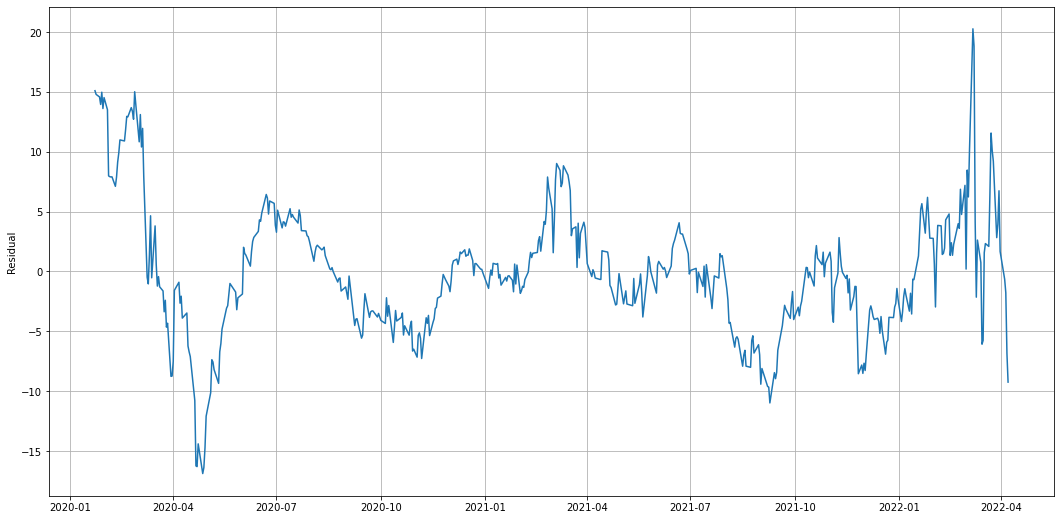

In [15]:
resid = pd.DataFrame(results.resid)
resid = resid.set_index(date)
plt.figure(figsize=(18,9))
plt.plot(resid)
plt.grid()
plt.ylabel('Residual')
plt.savefig('resid.png',dpi = 300)

In [17]:

res_adf=adfuller(results.resid)
print(res_adf)
res_LB = lb_test(results.resid, lags=20)
print(res_LB)

(-4.353187329461482, 0.00035887601826197933, 4, 491, {'1%': -3.4437386290417082, '5%': -2.867444458865948, '10%': -2.5699148492415413}, 2004.5897199843503)
        lb_stat      lb_pvalue
1    422.397622   7.338023e-94
2    780.901814  2.687359e-170
3   1097.161266  1.502896e-237
4   1379.883362  1.590657e-297
5   1619.699891   0.000000e+00
6   1829.591135   0.000000e+00
7   2018.409380   0.000000e+00
8   2184.294728   0.000000e+00
9   2337.502786   0.000000e+00
10  2479.954519   0.000000e+00
11  2619.936634   0.000000e+00
12  2754.253103   0.000000e+00
13  2877.161561   0.000000e+00
14  2987.111799   0.000000e+00
15  3086.612424   0.000000e+00
16  3172.211913   0.000000e+00
17  3239.053073   0.000000e+00
18  3290.723790   0.000000e+00
19  3329.564237   0.000000e+00
20  3355.777599   0.000000e+00


### SVM


Test MSE: 1083.340


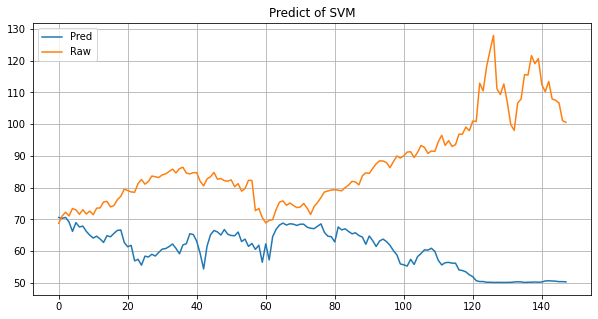

In [86]:
clf = svm.SVR() # can change to other kernels
clf.fit(X_train, Y_train)
Y_pred_SVM = clf.predict(X_test)
plt.figure(figsize = [10,5])
plt.plot(range(len(X_test)), Y_pred_SVM, label = 'Pred')
plt.plot(range(len(X_test)), Y_test, label = 'Raw')
plt.title("Predict of SVM")
plt.grid()
plt.legend()
plt.savefig('./Latex/SVM.png')
# calculate RMSE
mse = mean_squared_error(Y_test, Y_pred_SVM)
print('Test MSE: %.3f' % mse)

### LSTM

In [24]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg
 

In [65]:
dataset = principalDf.join(pd.DataFrame(Brent))
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())
dataset


   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.248107   0.366573   0.192598   0.393097  0.236254
2   0.236254   0.376601   0.201950   0.380672  0.223134
3   0.223134   0.407356   0.242704   0.368063  0.232123
4   0.232123   0.400633   0.224084   0.369811  0.228373
5   0.228373   0.377886   0.378969   0.372572  0.228076


,principal component 1,principal component 2,principal component 3,Brent
0,-1.741033,0.292534,-2.026578,62.040001
1,-1.855201,0.359604,-1.960310,60.689999
2,-1.981565,0.565300,-1.671538,59.320000
3,-1.894983,0.520334,-1.803475,59.509998
4,-1.931107,0.368197,-0.705987,59.810001
...,...,...,...,...
491,4.706186,1.912679,1.157305,107.910004
492,4.873152,2.159901,0.159058,107.529999
493,4.883989,2.507204,0.268433,106.639999
494,4.813391,2.601564,-0.094942,101.070000


In [89]:
values = reframed.values
n_train_hours = int(np.ceil(len(values)*0.7))
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(347, 1, 4) (347,) (148, 1, 4) (148,)


In [90]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=2000, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
 

Epoch 1/2000
5/5 - 1s - loss: 0.2722 - val_loss: 0.6424 - 632ms/epoch - 126ms/step
Epoch 2/2000
5/5 - 0s - loss: 0.2369 - val_loss: 0.5941 - 13ms/epoch - 3ms/step
Epoch 3/2000
5/5 - 0s - loss: 0.2034 - val_loss: 0.5452 - 14ms/epoch - 3ms/step
Epoch 4/2000
5/5 - 0s - loss: 0.1714 - val_loss: 0.4972 - 16ms/epoch - 3ms/step
Epoch 5/2000
5/5 - 0s - loss: 0.1476 - val_loss: 0.4531 - 14ms/epoch - 3ms/step
Epoch 6/2000
5/5 - 0s - loss: 0.1314 - val_loss: 0.4139 - 16ms/epoch - 3ms/step
Epoch 7/2000
5/5 - 0s - loss: 0.1195 - val_loss: 0.3795 - 15ms/epoch - 3ms/step
Epoch 8/2000
5/5 - 0s - loss: 0.1119 - val_loss: 0.3512 - 16ms/epoch - 3ms/step
Epoch 9/2000
5/5 - 0s - loss: 0.1084 - val_loss: 0.3300 - 16ms/epoch - 3ms/step
Epoch 10/2000
5/5 - 0s - loss: 0.1064 - val_loss: 0.3154 - 16ms/epoch - 3ms/step
Epoch 11/2000
5/5 - 0s - loss: 0.1050 - val_loss: 0.3064 - 14ms/epoch - 3ms/step
Epoch 12/2000
5/5 - 0s - loss: 0.1033 - val_loss: 0.3019 - 16ms/epoch - 3ms/step
Epoch 13/2000
5/5 - 0s - loss: 0.1

In [91]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
mse = mean_squared_error(inv_y, inv_yhat)
print('Test RMSE: %.3f' % mse)


ValueError: operands could not be broadcast together with shapes (148,4) (10,) (148,4) 

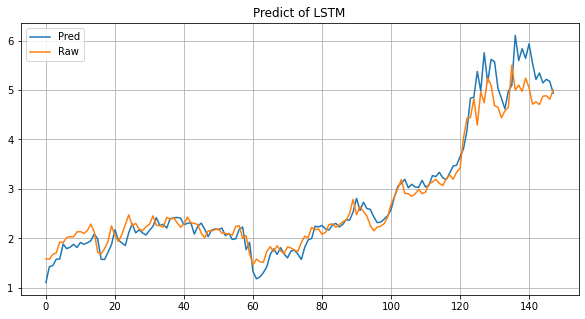

In [76]:
plt.figure(figsize = [10,5])
plt.plot(range(len(X_test)), inv_yhat, label = 'Pred')
plt.plot(range(len(X_test)), inv_y, label = 'Raw')
plt.title("Predict of LSTM")
plt.grid()
plt.legend()
plt.savefig('./Latex/LSTM.png')
